# TRABAJO PRÁCTICO N°2
Grupo: Valeriano Jurado, Brian Luciano ; Zerpa, Margarita

In [78]:
import imageio as imageio
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image  # Importa el módulo Image de Pillow

C:\Users\BRIAN\AppData\Local\Temp\ipykernel_37352\216738836.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im1 = imageio.imread('bosque.bmp')


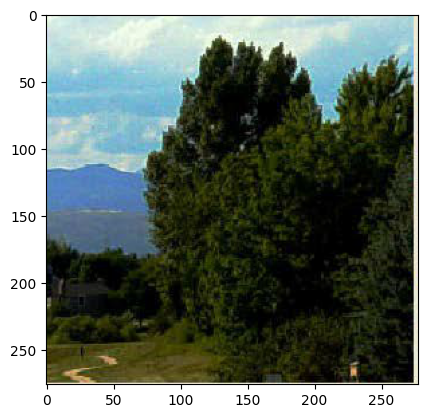

C:\Users\BRIAN\AppData\Local\Temp\ipykernel_37352\216738836.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im2=imageio.imread('fuente.bmp')


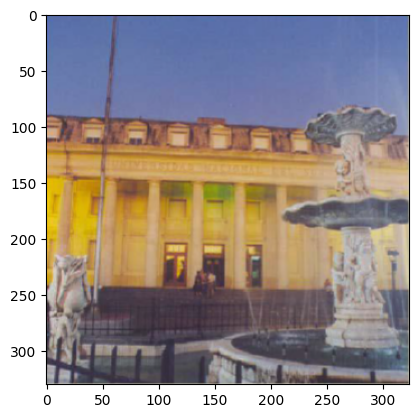

In [79]:
#im1 = imageio.imread('imageio:coffee.png')[:,50:550,:]/255.
im1 = imageio.imread('bosque.bmp')

plt.imshow(im1)
plt.show()

#im2=imageio.imread('imageio:astronaut.png')[56:456,6:506,:]/255.
im2=imageio.imread('fuente.bmp')

plt.imshow(im2)
plt.show()

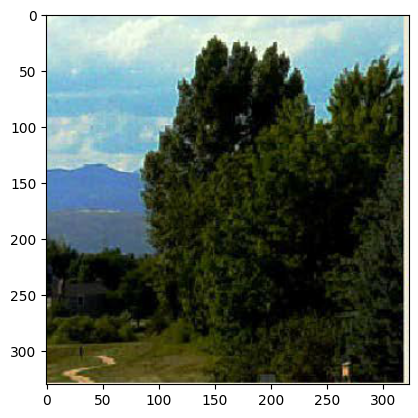

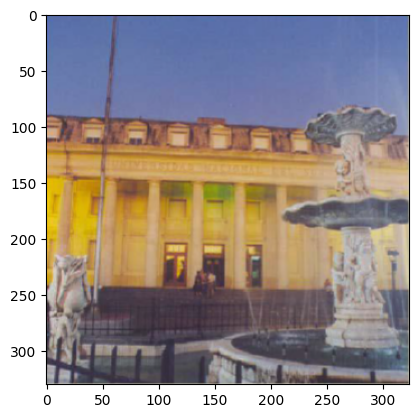

In [80]:
#REDIMENSION DE LAS IMAGENES
# Obtenemos las dimensiones de ambas imágenes
height1, width1, _ = im1.shape
height2, width2, _ = im2.shape

# Comparamos las dimensiones y redimensionamos si es necesario
if height1 != height2 or width1 != width2:
    # Encontramos el tamaño máximo
    new_height = max(height1, height2)
    new_width = max(width1, width2)

    # Redimensionamos ambas imágenes al tamaño máximo con NumPy
    im1 = np.array(Image.fromarray(im1).resize((new_width, new_height)))
    im2 = np.array(Image.fromarray(im2).resize((new_width, new_height)))

# Ahora ambas imágenes (im1 e im2) tienen las mismas dimensiones

plt.imshow(im1)
plt.show()

plt.imshow(im2)
plt.show()

In [81]:
# Normalizar los valores de RGB del pixel: dividir los valores 0 a 255 por 255 
#para obtener valores en el rango de 0 a 1. (no se usa)
def normalize_rgb(img):
    return np.clip(img /255.,0.,1.)

In [82]:
#Convertir R’G’B’ a bytes y graficar el pixel
def RGB_to_bytes(img):
    return np.clip(img,0,255)

In [83]:
#Chequear que Y’ <= 1 (para que no se vaya de rango)
#Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
def check_yiq(yiq):
    yiq[:, :, 0] = np.clip(yiq[:, :, 0], 0, 1)  # Asegura que Y' esté en [0, 1]
    yiq[:, :, 1] = np.clip(yiq[:, :, 1], -0.5957, 0.5957)# Asegura que I' esté en [-0.5957, 0.5957]
    yiq[:, :, 2] = np.clip(yiq[:, :, 2], -0.5226, 0.5226)# Asegura que Q' esté en [-0.5226, 0.5226]
    return yiq

In [84]:
def RGB_to_YIQ(rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:, :, 0] = 0.229 * rgb[:, :, 0] + 0.587 * rgb[:, :, 1] + 0.114 * rgb[:, :, 2]
    yiq[:, :, 1] = 0.595716 * rgb[:, :, 0] - 0.274453 * rgb[:, :, 1] - 0.321263 * rgb[:, :, 2]
    yiq[:, :, 2] = 0.211456 * rgb[:, :, 0] - 0.522591 * rgb[:, :, 1] + 0.311135 * rgb[:, :, 2]
    return yiq

In [85]:
def YIQ_to_RGB(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:, :, 0] = yiq[:, :, 0] + 0.9663 * yiq[:, :, 1] + 0.6210 * yiq[:, :, 2]
    rgb[:, :, 1] = yiq[:, :, 0] - 0.2721 * yiq[:, :, 1] - 0.6474 * yiq[:, :, 2]
    rgb[:, :, 2] = yiq[:, :, 0] - 1.1070 * yiq[:, :, 1] + 1.7046 * yiq[:, :, 2]
    return rgb

# OPERACIONES EN EL ESPACIO RGB

In [51]:
#SUMA CLAMPEADA EN EL ESPACIO RGB
def suma_clampeada_rgd(image_A,image_B):
    image_C = np.zeros(image_A.shape)
    image_C = image_A + image_B
    return image_C

In [52]:
#RESTA CLAMPEADA EN EL ESPACIO RGB
def resta_clampeada_rgd(image_A,image_B):
    image_C = np.zeros(image_A.shape)
    image_C = image_A - image_B
    return image_C

In [53]:
#SUMA PROMEDIADA EN EL ESPACIO RGB
def suma_promediada_rgd(image_A,image_B):
    image_C = np.zeros(image_A.shape)
    image_C = (image_A + image_B)/2
    return image_C

In [63]:
#RESTA CLAMPEADA EN EL ESPACIO RGB
def resta_promediada_rgd(image_A,image_B):
    image_C = np.zeros(image_A.shape)
    image_C = (image_A - image_B)/2
    return image_C

# OPERACIONES EN EL ESPACIO YIQ

In [7]:
#SUMA CLAMPEADA EN EL ESPACIO YIQ
#YC := YA + YB; If YC > 1 then YC:=1;
def suma_clampeada(A , B):
    
    s_clam = np.zeros(A[:, :, 0].shape)
    
    s_clam = A[:, :, 0] + B[:, :, 0]
    
    #If YC > 1 then YC:=1
    #print('Salida previa:',s_clam) 
    s_clam[s_clam > 1] = 1
    #print('Salida modificada: ',s_clam)
    return s_clam

In [43]:
#PRUEBA DE SUMA CLAMPEADA
suma_clampeada(im1,im2)  #funciona correctamente

Salida previa: [[0.6745098  0.49411765 0.36470588 ... 1.38431373 1.4        1.40784314]
 [0.59215686 0.38431373 0.31372549 ... 1.38823529 1.4        1.39215686]
 [0.50196078 0.31764706 0.32156863 ... 1.39215686 1.4        1.39215686]
 ...
 [1.24313725 1.22352941 1.20784314 ... 0.51372549 0.53333333 0.65490196]
 [1.23137255 1.20784314 1.20784314 ... 0.52941176 0.61568627 0.69019608]
 [1.25882353 1.21176471 1.25490196 ... 0.69803922 0.6627451  0.78039216]]
Salida modificada:  [[0.6745098  0.49411765 0.36470588 ... 1.         1.         1.        ]
 [0.59215686 0.38431373 0.31372549 ... 1.         1.         1.        ]
 [0.50196078 0.31764706 0.32156863 ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.51372549 0.53333333 0.65490196]
 [1.         1.         1.         ... 0.52941176 0.61568627 0.69019608]
 [1.         1.         1.         ... 0.69803922 0.6627451  0.78039216]]


array([[0.6745098 , 0.49411765, 0.36470588, ..., 1.        , 1.        ,
        1.        ],
       [0.59215686, 0.38431373, 0.31372549, ..., 1.        , 1.        ,
        1.        ],
       [0.50196078, 0.31764706, 0.32156863, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.51372549, 0.53333333,
        0.65490196],
       [1.        , 1.        , 1.        , ..., 0.52941176, 0.61568627,
        0.69019608],
       [1.        , 1.        , 1.        , ..., 0.69803922, 0.6627451 ,
        0.78039216]])

In [8]:
#RESTA CLAMPEADA EN EL ESPACIO YIQ
#YC := YA - YB; If YC < 0 then YC:=0;
def resta_clampeada(A , B):
    
    r_clam = np.zeros(A[:, :, 0].shape)
    
    r_clam = A[:, :, 0] - B[:, :, 0]
    
    #If YC < 0 then YC:=0
    #print('Luminansia previa:',r_clam) 
    r_clam[r_clam < 0] = 0
    #print('Luminansia modificada: ',r_clam)
    return r_clam

In [49]:
#PRUEBA DE RESTA CLAMPEADA
resta_clampeada(yiq1,yiq2) #funciona correctamente

Luminansia previa: [[-0.37102353 -0.20260392 -0.09252549 ...  0.02424706  0.03063922
   0.05252157]
 [-0.29986667 -0.11448627 -0.05138039 ...  0.03332549  0.02289804
   0.04477255]
 [-0.21527843 -0.06834118 -0.05547843 ...  0.00280392 -0.00083922
   0.03063137]
 ...
 [ 0.53671765  0.56903529  0.58451765 ...  0.29033725  0.30121961
   0.39970588]
 [ 0.54759216  0.55893333  0.56532549 ...  0.30908235  0.37646667
   0.39723922]
 [ 0.55815294  0.55983137  0.6291098  ...  0.23107059  0.38398039
   0.46290588]]
Luminansia modificada:  [[0.         0.         0.         ... 0.02424706 0.03063922 0.05252157]
 [0.         0.         0.         ... 0.03332549 0.02289804 0.04477255]
 [0.         0.         0.         ... 0.00280392 0.         0.03063137]
 ...
 [0.53671765 0.56903529 0.58451765 ... 0.29033725 0.30121961 0.39970588]
 [0.54759216 0.55893333 0.56532549 ... 0.30908235 0.37646667 0.39723922]
 [0.55815294 0.55983137 0.6291098  ... 0.23107059 0.38398039 0.46290588]]


array([[0.        , 0.        , 0.        , ..., 0.02424706, 0.03063922,
        0.05252157],
       [0.        , 0.        , 0.        , ..., 0.03332549, 0.02289804,
        0.04477255],
       [0.        , 0.        , 0.        , ..., 0.00280392, 0.        ,
        0.03063137],
       ...,
       [0.53671765, 0.56903529, 0.58451765, ..., 0.29033725, 0.30121961,
        0.39970588],
       [0.54759216, 0.55893333, 0.56532549, ..., 0.30908235, 0.37646667,
        0.39723922],
       [0.55815294, 0.55983137, 0.6291098 , ..., 0.23107059, 0.38398039,
        0.46290588]])

In [9]:
#SUMA PROMEDIADA EN EL ESPACIO YIQ
#YC := (YA + YB) / 2;

def suma_promediada(A , B):
    
    s_prom = np.zeros(A[:, :, 0].shape)
    
    s_prom = (A[:, :, 0] + B[:, :, 0]) / 2
    
    return  s_prom

In [10]:
#RESTA PROMEDIADA EN EL ESPACIO YIQ
#YC := (YA - YB) / 2;

def resta_promediada(A , B):
    
    r_prom = np.zeros(A[:, :, 0].shape)
    
    r_prom = (A[:, :, 0] - B[:, :, 0]) / 2
    
    return r_prom

In [15]:
def interpolacion(image_A,image_B):
   
    IC = np.zeros(image_A.shape)
    QC = np.zeros(image_A.shape)
    
    #IC := (YA * IA + YB * IB) / (YA + YB) ;
    IC = (image_A[:, :, 0] * image_A[:, :, 1] + image_B[:, :, 0] * image_B[:, :, 1])/(image_A[:, :, 0]+image_B[:, :, 0])
    
    #QC := (YA * QA + YB * QB) / (YA + YB) ; 
    QC = (image_A[:, :, 0] * image_A[:, :, 2] + image_B[:, :, 0] * image_B[:, :, 2])/(image_A[:, :, 0]+image_B[:, :, 0])
    
    return IC,QC

# IF LIGTHER

La operación "If lighter" (en español, "si es más claro") es una operación que se utiliza en el procesamiento de imágenes y gráficos para combinar dos imágenes o elementos gráficos de manera que el resultado tenga el valor de píxel más claro entre las dos fuentes. Esto se hace comparando los valores de luminancia o brillo en cada píxel de las dos imágenes y seleccionando el valor más claro para el píxel resultante.

In [86]:
#FUNCION IL_LIGTHER

#ifYA > YB then{YC := YA; IC := IA; QC := QA}
#else{YC := YB; IC := IB; QC := QB};

def if_lighter(image_A, image_B):
    # Extraer los componentes Y de las imágenes A y B
    YA = image_A[:, :, 0]
    IA = image_A[:, :, 1]
    QA = image_A[:, :, 2]
    
    YB = image_B[:, :, 0]
    IB = image_B[:, :, 1]
    QB = image_B[:, :, 2]
    
    # Inicializar las matrices de salida para Y, I y Q
    YC = np.zeros(YA.shape)
    IC = np.zeros(YA.shape)
    QC = np.zeros(YA.shape)
    image_C = np.zeros(image_A.shape)

    # Aplicar la operación if-lighter
    #ifYA > YB then{YC := YA; IC := IA; QC := QA}
    mask = YA > YB
    YC[mask] = YA[mask]
    IC[mask] = IA[mask]
    QC[mask] = QA[mask]
    
    mask = ~mask  # Negar la máscara para el caso opuesto
    #else{YC := YB; IC := IB; QC := QB};
    YC[mask] = YB[mask]
    IC[mask] = IB[mask]
    QC[mask] = QB[mask]

    # Combinar los componentes Y, I y Q en la imagen de salida
    #image_C = np.stack((YC, IC, QC), axis=-1)

    image_C[:, :, 0] = YC
    image_C[:, :, 1] = IC
    image_C[:, :, 2] = QC
    
    return image_C

# IF DARKER
La operación "If-darker" (en español, "si es más oscuro") es el complemento de la operación "If-lighter". Al igual que "If-lighter", se utiliza en el procesamiento de imágenes y gráficos para combinar dos imágenes o elementos gráficos de manera que el resultado tenga el valor de píxel más oscuro entre las dos fuentes. Esto se hace comparando los valores de luminancia o brillo en cada píxel de las dos imágenes y seleccionando el valor más oscuro para el píxel resultante.

In [89]:
#FUNCION IF_DARKER

def if_darker(image_A, image_B):
    # Extraer los componentes Y de las imágenes A y B
    YA = image_A[:, :, 0]
    IA = image_A[:, :, 1]
    QA = image_A[:, :, 2]
    
    YB = image_B[:, :, 0]
    IB = image_B[:, :, 1]
    QB = image_B[:, :, 2]

    # Inicializar las matrices de salida para Y, I y Q
    YC = np.zeros(YA.shape)
    IC = np.zeros(YA.shape)
    QC = np.zeros(YA.shape)

    # Aplicar la operación if-darker
    mask = YA < YB  # En lugar de YA > YB, ahora comparamos si YA es menor que YB
    YC[mask] = YA[mask]
    IC[mask] = IA[mask]
    QC[mask] = QA[mask]
    
    mask = ~mask  # Negar la máscara para el caso opuesto
    YC[mask] = YB[mask]
    IC[mask] = IB[mask]
    QC[mask] = QB[mask]

    # Combinar los componentes Y, I y Q en la imagen de salida
    image_C = np.stack((YC, IC, QC), axis=-1)

    return image_C

# Prueba de Funciones en el espacio RGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


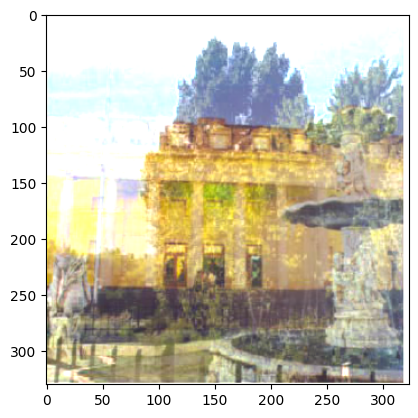

In [92]:
rgb = np.zeros(im2.shape)

#DESCOMENTAR AQUELLAS LINEAS QUE SE QUIERAN PROBAR ***************************************
#ES NECESARIO NORMALIZAR LAS IMAGENES PREVIAMENTE

rgb = suma_clampeada_rgd(im1,im2)

#rgb = resta_clampeada_rgd(im1,im2)

#rgb = suma_promediada_rgd(im1,im2)

#rgb = resta_promediada_rgd(im1,im2)

#DESCOMENTAR AQUELLAS LINEAS QUE SE QUIERAN PROBAR ***************************************

rgb = RGB_to_bytes(rgb)

plt.imshow(rgb)
plt.show()

# Prueba de Funciones en el espacio YIQ

In [87]:
# Paso 1: Normalizamos la imagen
# Paso 2: Convertir RGB a YIQ

im1 = normalize_rgb(im1)
yiq1 = RGB_to_YIQ(im1)
print(yiq1.shape)

im2 = normalize_rgb(im2)
yiq2 = RGB_to_YIQ(im2)
print(yiq2.shape)

(330, 324, 3)
(330, 324, 3)


(-0.5, 323.5, 329.5, -0.5)

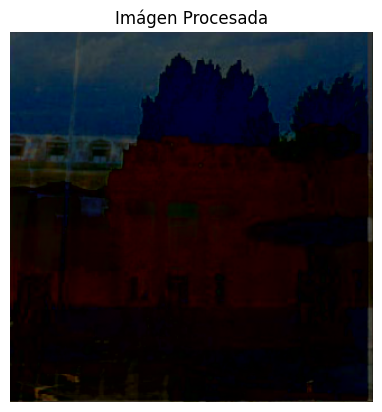

In [91]:
#
yiq3 = np.zeros(yiq1.shape)

#DESCOMENTAR AQUELLAS LINEAS QUE SE QUIERAN PROBAR ***************************************

#SUMA CLAMPEADA EN EL ESPACIO YIQ (CUASI-SUMA)
#YC = suma_clampeada(yiq1,yiq2) 

#RESTA CAMPLEADA EN EL ESPACIO YIQ (CUASI-SUMA)
#YC = resta_clampeada(yiq1,yiq2)

#SUMA PROMEDIADA EN EL ESPACIO YIQ (CUASI-SUMA)
#YC = suma_promediada(yiq1,yiq2)

#RESTA PROMEDIADA EN EL ESPACIO YIQ (CUASI-SUMA)
YC = resta_promediada(yiq1,yiq2)

#INTERPOLACION EN EL ESPACIO YIQ
#IC = (yiq1[:,:,0]*yiq1[:,:,1]+yiq2[:,:,0]*yiq2[:,:,1])/(yiq1[:,:,0]+yiq2[:,:,0])
#QC = (yiq1[:,:,0]*yiq1[:,:,2]+yiq2[:,:,0]*yiq2[:,:,2])/(yiq1[:,:,0]+yiq2[:,:,0])
IC,QC = interpolacion(yiq1,yiq2)

#OPERACION IF LIGTHER  -> SE APROXIMA
#yiq3 = if_lighter(yiq1,yiq2)

#OERACION IF DARKER  -> SE APROXIMA
#yiq3 = if_darker(yiq1,yiq2)

#plt.figure(0)
#plt.imshow(YC)
#plt.figure(1)
#plt.imshow(IC)
#plt.figure(2)
#plt.imshow(QC)

yiq3[:,:,0] = YC
yiq3[:,:,1] = IC
yiq3[:,:,2] = QC

#DESCOMENTAR AQUELLAS LINEAS QUE SE QUIERAN PROBAR ***************************************

#CHEQUEAMOS LOS VALORES YIQ
yiq3 = check_yiq(yiq3)
#MOSTRAMOS LA IMAGEN RESULTANTE
img_resultado = RGB_to_bytes(YIQ_to_RGB(yiq3))

plt.imshow(img_resultado)
plt.title("Imágen Procesada")
plt.axis('off')